In [55]:
# Read dataset and split to train and test data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Read the csv file to pandas dataframe
dataset = pd.read_csv('assets/output/preprocessedDataset.csv')

print(dataset)

# Split the dataset to X and Y
Y = dataset.loc[:,'visitor']
X = dataset.drop(['date','visitor'], axis=1)


# Split the train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

            date  sulfur_dioxide_min  sulfur_dioxide_max  sulfur_dioxide_mean  \
0     2008-10-01           -0.107143           -0.612667            -0.466973   
1     2008-10-02           -0.671919            0.220472            -0.225316   
2     2008-10-03            0.457632            0.220472             0.152274   
3     2008-10-04            0.457632            0.220472             0.454345   
4     2008-10-05            1.022408            0.428756             0.665795   
...          ...                 ...                 ...                  ...   
3946  2020-01-27            1.474229            1.261895             1.385937   
3947  2020-01-28            1.248318            1.178581             1.345137   
3948  2020-01-29            1.135363            1.386866             1.431959   
3949  2020-01-30            1.022408            2.395890             1.509582   
3950  2020-01-31            1.022408            1.377609             1.257352   

      sulfur_dioxide_median

In [56]:
# Make the Model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

grid_params = {'n_estimators': np.arange(300,600, 100),
            'max_depth': np.arange(1,5,1),
            'min_samples_split': np.arange(2,5,1),
            'learning_rate': [0.05,0.1],
            'loss': ['squared_error']}

model = GradientBoostingRegressor(random_state=0)

grid_model = GridSearchCV(model, param_grid=grid_params, cv=5, n_jobs=-1)

In [57]:
# Fit the model
from sklearn.metrics import mean_squared_error

grid_model.fit(X_train, Y_train)

print('최적 하이퍼 파라미터:\n', grid_model.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_model.best_score_))

최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'loss': 'squared_error', 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 300}
최고 예측 정확도: 0.3702


In [58]:
# Define the model with best parameters

model = GradientBoostingRegressor(**grid_model.best_params_)
model.fit(X_train, Y_train)
print(model.score(X_test, Y_test))

0.3865031342540848


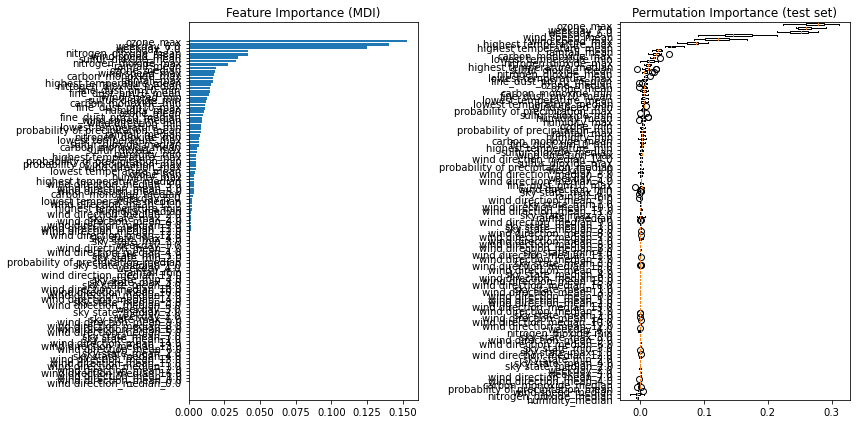

In [59]:
from sklearn.inspection import permutation_importance


feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    model, X_test, Y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X_train.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [60]:
reduced_X = X_train.iloc[:, sorted_idx[30:]]

model = GradientBoostingRegressor(**grid_model.best_params_)
model.fit(reduced_X, Y_train)

print(model.score(X_test.iloc[:, sorted_idx[30:]], Y_test))

0.39796212261695585
